# Logistic Regression (Movie Reviews Sentiment Prediction)

## Explanation

create a machine learning model that can predict whether the Movie Review is Positive or Negative, using a Logistic Regression algorithm.

### Column Descriptions

- ***review*** = User review for the movie
- ***sentiment (label)*** = Review classification (Negative / Positive)

## A. Data Preparation

### A.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download resource yang dibutuhkan
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt') # Tambahan penting buat misahin kata (tokenizing)
nltk.download('punkt_tab') # Jaga-jaga kalau error punkt versi baru

list_stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nahls\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nahls\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nahls\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nahls\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nahls\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### A.2 Load Data

In [2]:
try:
    df = pd.read_csv("imdb_reviews.csv")
    print("Berhasil Membaca Data")
except:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [3]:
df.shape

(50000, 2)

### A.4 Viewing Data Informations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### A.5 Viewing Data Statistics

#### No Statistics for NLP Data

### A.6 Viewing Top 5 Data and Bottom 5 Data

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


### A.7 Viewing Duplicated Data

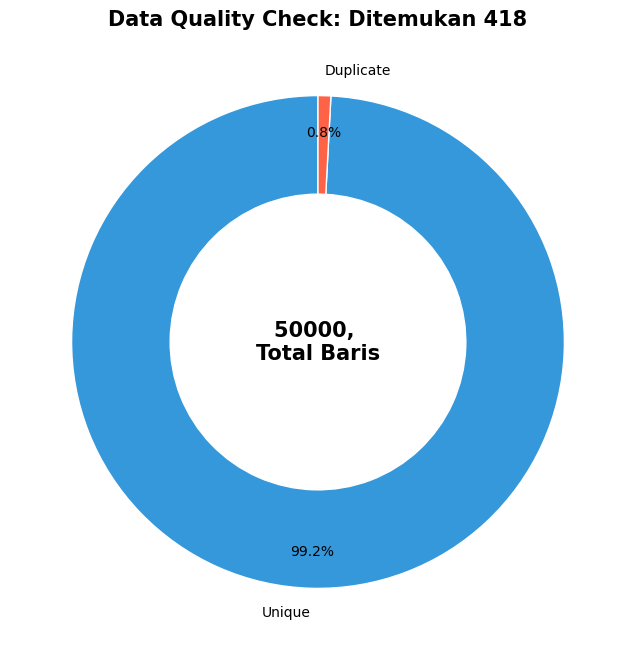

In [7]:
n_dup = df.duplicated().sum()
sizes = [len(df) - n_dup, n_dup]

plt.figure(figsize = (10, 8))
color = ['#3498db', 'tomato']

plt.pie(sizes, labels=['Unique', 'Duplicate'], colors = color, autopct='%1.1f%%',
        startangle = 90, pctdistance = 0.85, wedgeprops={'width': 0.4, 'edgecolor': 'white'})
plt.text(0, 0, f"{len(df):}, \nTotal Baris", ha = 'center', va = 'center', fontsize = 15, fontweight = 'bold')
plt.title(f"Data Quality Check: Ditemukan {n_dup}", fontsize  = 15, fontweight = 'bold')

plt.show()

In [8]:
df.drop_duplicates(inplace=True)

### A.8 Viewing Missing Data

In [9]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

### A.9 Viewing Outlier Data

#### No Outliers For NLP Data

## B. Data Preprocessing

### B.1 Mapping Label

In [10]:
df_clean = df.copy()

In [11]:
sentiment_mapping = {'negative' : 0, 'positive' : 1}

df_clean['sentiment'] = df['sentiment'].map(sentiment_mapping)

## C. Text Preprocessing

### C.1 Text Cleaning & Lemmatizing

In [12]:
def clean_text(text):
    # 1. Lowercase (Biar 'Good' dan 'good' dianggap sama)
    text = text.lower()
    
    # 2. Hapus HTML Tags (IMDB banyak <br /> nya)
    text = re.sub(r'<.*?>', '', text)
    
    # 3. Hapus Karakter Selain Huruf (Angka & Simbol buang)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # 4. Tokenization (Pecah kalimat jadi kata-kata)
    words = word_tokenize(text)
    
    # 5. Stopwords Removal & Lemmatization (Gabung biar cepet)
    # "movies" -> "movie", "running" -> "run"
    # "is", "the", "and" -> Dibuang
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in list_stopwords]
    
    # Gabung lagi jadi kalimat utuh
    return " ".join(cleaned_words)

# Terapkan ke DataFrame (Agak lama karena datanya 50k, sabar ya!)
print("Sedang membersihkan data... (Bisa 1-2 menit)")
df_clean['review_clean'] = df_clean['review'].apply(clean_text)

Sedang membersihkan data... (Bisa 1-2 menit)


In [13]:
df_clean[['review', 'review_clean', 'sentiment']].head()

,review,review_clean,sentiment
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode you...,1
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...,1
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,1
3,Basically there's a family where a little boy ...,basically there family little boy jake think t...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...,1


### C.2 TF-IDF Formulas

#### Build Vocabulary

In [14]:
corpus = df_clean['review_clean'].apply(lambda x: str(x).split()).tolist()
N = len(corpus)

#### Calculate TF (Term Frequency)

In [15]:
tf_data = []  # List 

for doc in corpus:
    len_doc = len(doc)
    doc_tf = {}  # Wadah per dokumen 
    
    # Cuma hitung kalau ada isinya
    if len_doc > 0:
        word_freq = {}
        for w in doc:
            word_freq[w] = word_freq.get(w, 0) + 1
        
        for word, freq in word_freq.items():
            doc_tf[word] = freq / len_doc
    
    # Append agar jumlah tf_data sama persis dengan jumlah corpus (N)
    tf_data.append(doc_tf)

#### Calculate IDF (Inverse Document Frequency)

In [16]:
df_counts = {}

for doc in corpus:
    # Pake unique biar kata yg muncul 2x di 1 dokumen tetep dihitung 1
    unique_words = np.unique(doc) 
    for word in unique_words:
        df_counts[word] = df_counts.get(word, 0) + 1

# Hitung Nilai IDF
idf_dict = {}
for word, count in df_counts.items():
    # Pake log10 dan smoothing (+1)
    idf_dict[word] = np.log10(N / (count + 1))

#### Calculate TF-IDF

In [19]:
tfidf_data = [] # List hasil akhir
keyword_scores = {} #  akumulasi visualisasi nanti

# Loop setiap dokumen lagi
for i in range(N):
    doc_tfidf = {}
    
    # Ambil TF dokumen ke-i 
    current_tf = tf_data[i]
    
    for word, tf_val in current_tf.items():
        # Ambil IDF kata tersebut 
        idf_val = idf_dict.get(word, 0)
        
        # KALIIN (TF * IDF)
        score = tf_val * idf_val
        
        # Simpan
        doc_tfidf[word] = score
        
        # Akumulasi Visualisasi 
        keyword_scores[word] = keyword_scores.get(word, 0) + score
        
    tfidf_data.append(doc_tfidf)

## D. Exploratory Data Analysis (EDA)

### D.1 Univariate Analysis

#### Label Distributions

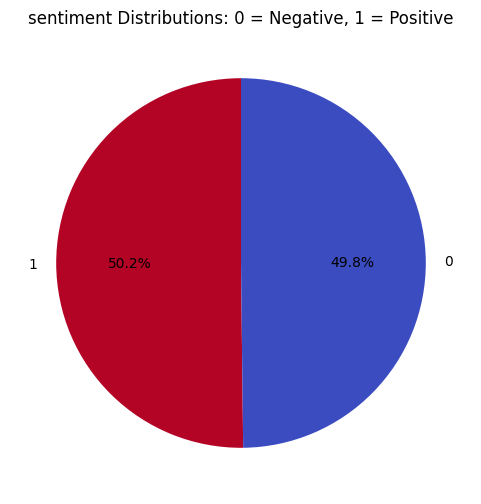

In [20]:
plt.figure(figsize=(6, 6))
df_clean['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm_r')
plt.title('sentiment Distributions: 0 = Negative, 1 = Positive')
plt.ylabel(None)
plt.show()

#### WordCloud Visualization

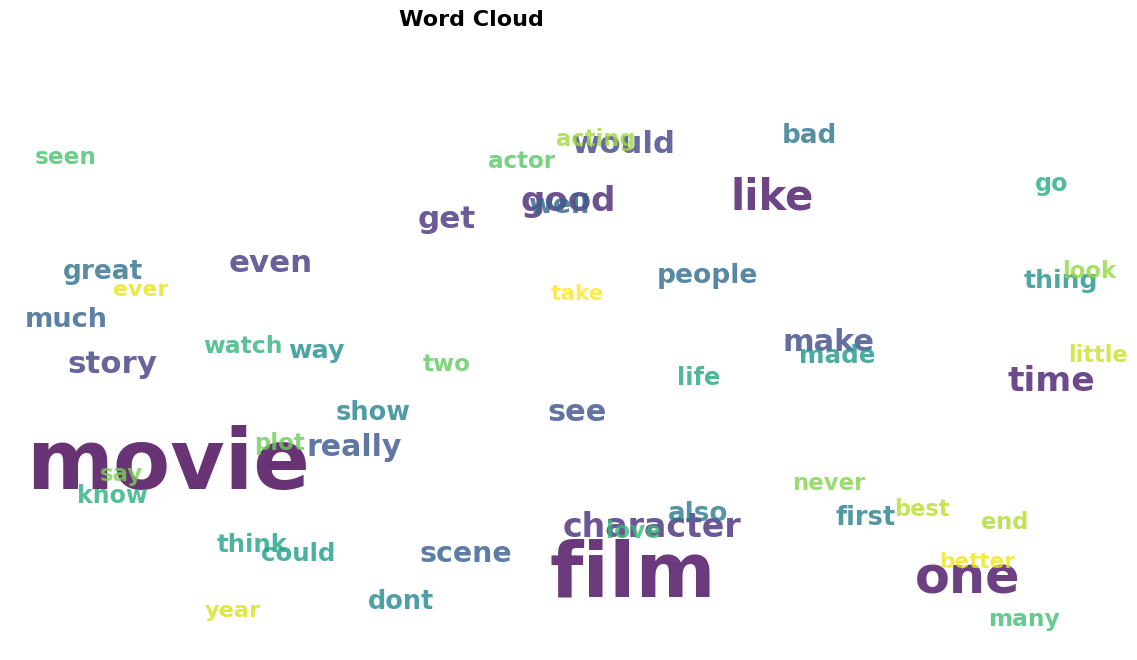

In [21]:
top_words = pd.Series(' '.join(df_clean['review_clean']).split()).value_counts().head(50)

# SETUP PLOT
plt.figure(figsize=(12, 8))
plt.axis('off')
plt.title('Word Cloud ', fontsize=16, fontweight='bold')

# Bikin warna gradasi otomatis 
colors = plt.cm.viridis(np.linspace(0, 1, len(top_words)))

# LOOP PLOTTING 
max_freq = top_words.iloc[0]

# zip() biar kita loop, frekuensi, dan warnanya barengan
for (word, freq), color in zip(top_words.items(), colors):
    
    # Hitung ukuran font
    size = (freq / max_freq) * 50 + 10
    
    # Generate posisi X, Y acak pake Numpy 
    x, y = np.random.randint(5, 120, 2)
    
    # Plot Teks
    plt.text(x, y, word, 
             fontsize=size, 
             color=color, 
             ha='center', va='center', 
             alpha=0.8, fontweight='bold')

plt.xlim(0, 100)
plt.ylim(0, 140)
plt.show()

### D.2 TF-IDF Analysis

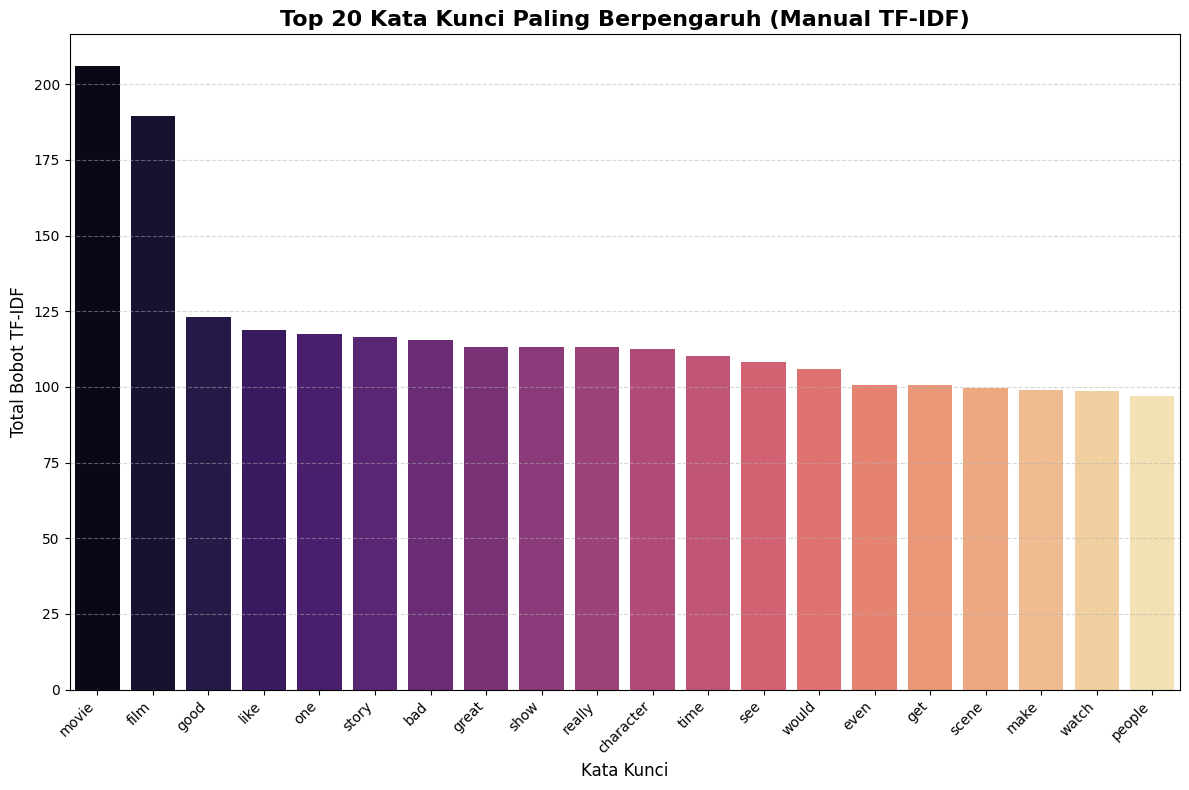


--- Tabel Top 10 Kata Kunci (Data-Driven) ---
No   Kata Kunci      Total Skor TF-IDF
----------------------------------------
1    movie           206.1708
2    film            189.4620
3    good            123.0881
4    like            118.7336
5    one             117.4670
6    story           116.4595
7    bad             115.4278
8    great           113.3200
9    show            113.2598
10   really          113.1299


In [22]:
# A. Menjumlahkan skor kata dari seluruh dokumen
keyword_total_scores = {}

for doc_scores in tfidf_data:
    for word, score in doc_scores.items():
        keyword_total_scores[word] = keyword_total_scores.get(word, 0) + score

# Ambil 20 Kata dengan Skor Tertinggi
# Mengubah dict ke list tuples -> Sort -> Ambil Top 20
sorted_keywords = sorted(keyword_total_scores.items(), key=lambda x: x[1], reverse=True)[:20]

# Pisahkan Kata dan Skornya buat sumbu X dan Y
words = [x[0] for x in sorted_keywords]
scores = [x[1] for x in sorted_keywords]

# C. Plotting (Bar Chart)
plt.figure(figsize=(12, 8))
sns.barplot(x=words, y=scores, palette='magma', hue=words, legend=False)

# Style Grafik 
plt.title('Top 20 Kata Kunci Paling Berpengaruh (Manual TF-IDF)', fontsize=16, fontweight='bold')
plt.xlabel('Kata Kunci', fontsize=12)
plt.ylabel('Total Bobot TF-IDF', fontsize=12)
plt.xticks(rotation=45, ha='right') # Miringin label biar gak tabrakan
plt.grid(axis='y', linestyle='--', alpha=0.5) # Garis bantu tipis
plt.tight_layout()

# Show
plt.show()

# Laporan Hasil 
print("\n--- Tabel Top 10 Kata Kunci (Data-Driven) ---")
print(f"{'No':<4} {'Kata Kunci':<15} {'Total Skor TF-IDF'}")
print("-" * 40)
for i, (w, s) in enumerate(sorted_keywords[:10], 1):
    print(f"{i:<4} {w:<15} {s:.4f}")

### D.3 N-Gram Analysis

#### Calculate Bigram

In [24]:
# Fungsi Bigram 
def generate_bigrams(text_list):
    bigram_list = []
    for text in text_list:
        words = text.split()
        #  ambil kata i dan kata i+1
        # zip(words, words[1:]) buat masangin [A, B, C] jadi (A,B), (B,C)
        if len(words) > 1:
            for i in range(len(words) - 1):
                bigram_list.append(words[i] + " " + words[i+1])
    return bigram_list

# Eksekusi
all_bigrams = generate_bigrams(df_clean['review_clean'])

# Hitung Frekuensi 
bigram_counts = {}
for bi in all_bigrams:
    bigram_counts[bi] = bigram_counts.get(bi, 0) + 1

# Sorting & Visualisasi
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)[:20]

#### Bigram Visualization

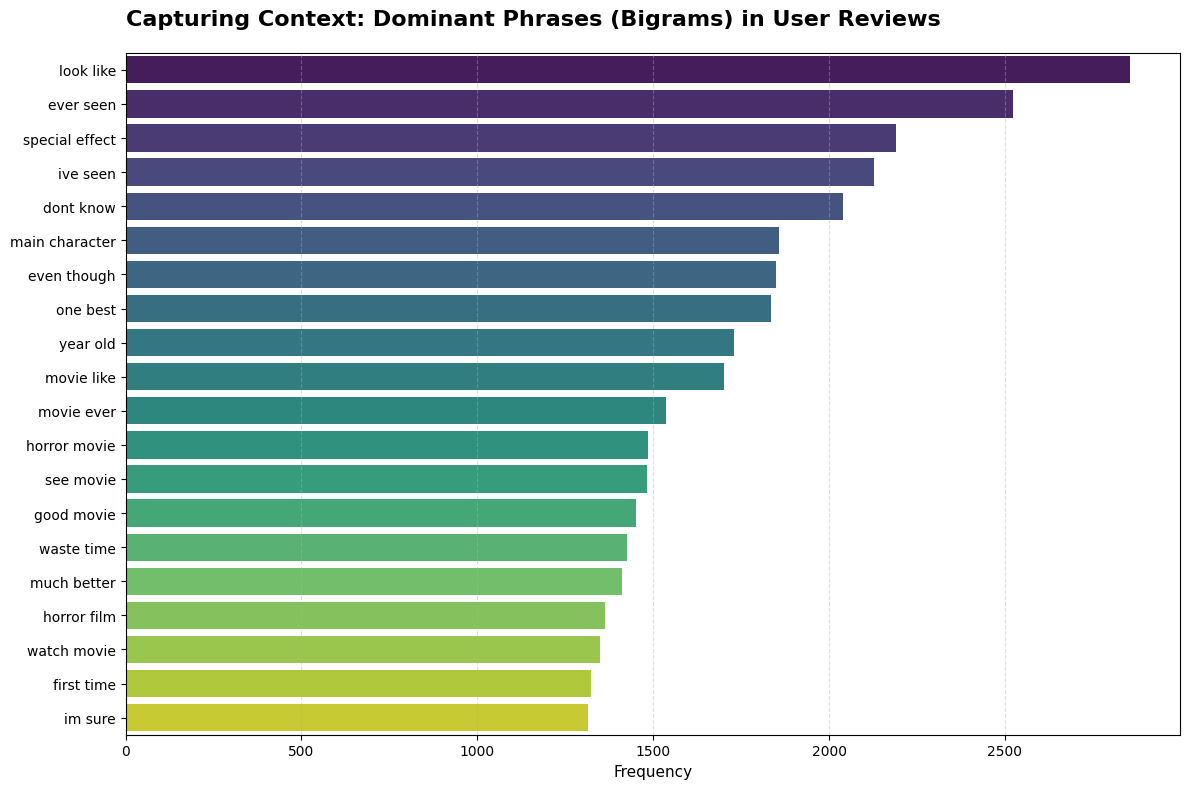

Top 5 Key Phrases:
- look like: 2855
- ever seen: 2522
- special effect: 2190
- ive seen: 2127
- dont know: 2040


In [25]:
bi_words = [x[0] for x in sorted_bigrams]
bi_counts = [x[1] for x in sorted_bigrams]

plt.figure(figsize=(12, 8))

# Story Telling
# Judul Utama: Fokus ke Insight/Tujuan
plt.title('Capturing Context: Dominant Phrases (Bigrams) in User Reviews', 
          fontsize=16, fontweight='bold', pad=20, loc='left') 
# loc='left' itu biar mata baca dari kiri atas

sns.barplot(x=bi_counts, y=bi_words, palette='viridis', hue=bi_words, legend=False)

# Label Sumbu: Jangan cuma "Frekuensi", tapi perjelas
plt.xlabel('Frequency', fontsize=11)
plt.ylabel(None) # Ilangin label Y "Pasangan Kata" karena udah jelas itu kata-kata

# Grid tipis biar mata gampang narik garis
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

print("Top 5 Key Phrases:")
for w, c in sorted_bigrams[:5]:
    print(f"- {w}: {c}")

## E. Modelling

### E.1 Convert TF-IDF to Matrix Numpy

In [43]:
# 1. Pilih 2000 kata terpenting (biar RAM kuat & akurasi dapet)
vocab = sorted(keyword_scores, key=keyword_scores.get, reverse=True)[:5000]
word_to_idx = {w: i for i, w in enumerate(vocab)}

# 2. Buat Matrix Kosong (Semua Data x 2000 Kolom)
X_matrix = np.zeros((len(tfidf_data), len(vocab)))

# 3. Isi Matrix-nya
for i, doc in enumerate(tfidf_data):
    for word, val in doc.items():
        if word in word_to_idx:
            X_matrix[i, word_to_idx[word]] = val

### E.2 Defining X (Feature) and y (Target) Variables

In [44]:
X_data = pd.DataFrame(X_matrix, columns=vocab)
y_data = df_clean['sentiment']

### E.3 Splitting Data Training and Data Testing (80:20)

In [45]:
def stratified_split(X_data, y_data, train_size=0.8, random_state=42, frac=None):
    np.random.seed(random_state)
    
    if frac:
        X_data = X_data.sample(frac=frac, random_state=random_state)
        y_data = y_data.loc[X_data.index]
        
    X_train_list, X_test_list = [],[]
    y_train_list, y_test_list = [],[]
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data==class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X_data.iloc[idx[:split_ratio]])
        X_test_list.append(X_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### E.4 Logistic Regression Formulas

#### Logit

In [ ]:
# def linear_equation(X, w, b):
#     # X: Data fitur
#     # w: Bobot (weights)
#     # b: Bias
#     z = np.dot(X, w) + b
#     return z

#### Sigmoid

In [ ]:
# def sigmoid(z):
#     # z: Hasil dari linear equation
#     return 1 / (1 + np.exp(-z))

#### Loss Function

In [ ]:
# def log_loss(y_true, y_pred):
#     # y_true: jawaban asli (0 atau 1)
#     # y_pred: Prediksi probabilitas dari sigmoid
    
#     epsilon = 1e-15
#     # Jepit nilai biar gak 0 murni atau 1 murni
#     y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
#     loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
#     return loss

#### Gradient Descent


In [ ]:
# def grad_desc(X, y_true, y_pred):
#     m = X.shape[0] # Jumlah data
    
#     # Hitung selisih tebakan (Error term)
#     error = y_pred - y_true
    
#     # Turunan terhadap bobot (w)
#     dw = (1 / m) * np.dot(X.T, error)
    
#     # Turunan terhadap bias (b)
#     db = (1 / m) * np.sum(error)
    
#     return dw, db

#### Update Parameter

In [ ]:
# def update_parameters(w, b, dw, db, learning_rate):
    
#     w_new = w - learning_rate * dw
#     b_new = b - learning_rate * db
    
#     return w_new, b_new

#### All In One

In [ ]:
# # 1. Inisialisasi
# w = np.zeros(X_train.shape[1])
# b = 0
# learning_rate = 5
# epochs = 1000

# loss_history = []
# accuracy_history = [] # Wadah baru

# print("Mulai Training...")
# for i in range(epochs):
#     # A. Maju (Forward Pass)
#     z = linear_equation(X_train, w, b)
#     y_pred = sigmoid(z)
    
#     # B. Hitung Loss
#     loss = log_loss(y_train, y_pred)
#     loss_history.append(loss)
    
#     # C. Hitung Akurasi
#     # 1. Ubah probabilitas jadi kelas (0 atau 1) pake threshold 0.7
#     prediksi_kelas = (y_pred >= 0.5).astype(int)
    
#     # 2. Bandingkan dengan jawaban (y_train)
#     acc = np.mean(prediksi_kelas == y_train)
#     accuracy_history.append(acc)
    
#     # D. Mundur
#     dw, db = grad_desc(X_train, y_train, y_pred)
    
#     # E. Update
#     w, b = update_parameters(w, b, dw, db, learning_rate)
    
#     if i % 10 == 0:
#         print(f"Epoch {i}: Loss = {loss:.4f} | Accuracy = {acc:.4f}")

# print("Training Selesai")

### E.5 Logistic Regression Training & Updating

In [ ]:
class LogisticRegressionManual:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.loss_history = []
        self.acc_history = []
        
    def _sigmoid(self, z):
        # Pengaman 1: Clip biar gak overflow (infinity)
        z = np.clip(z, -250, 250)
        return 1 / (1 + np.exp(-z))
    
    def _log_loss(self, y_true, y_pred):
        # Pengaman 2: Epsilon biar gak log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        # Konversi ke Numpy Array biar aman
        X = np.array(X)
        y = np.array(y)
        
        # Pengaman 3 (CRITICAL): Reshape y jadi (N, 1)
        # Ini obat manjur biar akurasi gak nyangkut 50%
        y = y.reshape(-1, 1)
        
        n_samples, n_features = X.shape
        
        # Init bobot
        self.w = np.zeros((n_features, 1))
        self.b = 0
        
        # Training Loop
        for i in range(self.n_iters):
            # A. Forward
            z = np.dot(X, self.w) + self.b
            y_pred = self._sigmoid(z)
            
            # B. Hitung Gradient
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # C. Update Parameter
            self.w -= self.lr * dw
            self.b -= self.lr * db
            
            # D. Record History (Opsional, buat monitoring)
            if i % 10 == 0:
                loss = self._log_loss(y, y_pred)
                self.loss_history.append(loss)
                
                # Hitung akurasi on-the-fly
                cls_pred = (y_pred >= 0.5).astype(int)
                acc = np.mean(cls_pred == y)
                self.acc_history.append(acc)
                
                if i % 50 == 0:
                    print(f"Epoch {i}: Loss {loss:.4f} | Accuracy {acc:.4f}")

    def predict_proba(self, X):
        X = np.array(X)
        z = np.dot(X, self.w) + self.b
        return self._sigmoid(z)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [ ]:
model = LogisticRegressionManual(learning_rate=5, n_iters=1000)
model.fit(X_train, y_train)

### E.6 Model Training Visualization

#### Loss Function

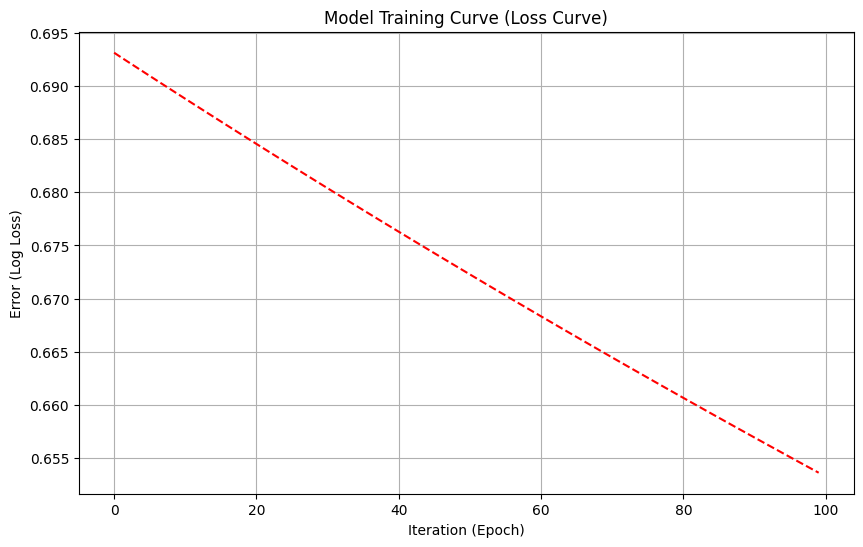

In [74]:
loss_data = model.loss_history

plt.figure(figsize=(10, 6))
plt.plot(loss_data, label='Training Loss', color='red', linestyle='--')
plt.title('Model Training Curve (Loss Curve)')
plt.xlabel('Iteration (Epoch)')
plt.ylabel('Error (Log Loss)')
plt.grid(True)
plt.show()

#### Accuracy Model

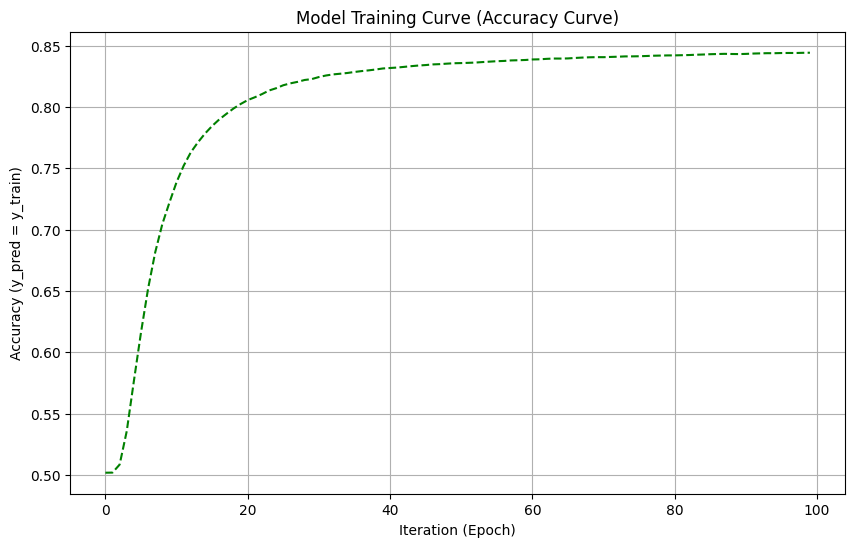

In [73]:
accuracy_data = model.acc_history

plt.figure(figsize=(10, 6))
plt.plot(accuracy_data, label='Training Accuracy', color='green', linestyle='--')
plt.title('Model Training Curve (Accuracy Curve)')
plt.xlabel('Iteration (Epoch)')
plt.ylabel('Accuracy (y_pred = y_train)')
plt.grid(True)
plt.show()

### E.7 Validation Curve (Finding Best Gap)

Starting Learning Rate Tuning...
Testing Learning Rate: 0.01
Epoch 0: Loss 0.6931 | Accuracy 0.5019
Epoch 50: Loss 0.6931 | Accuracy 0.5019
Epoch 100: Loss 0.6931 | Accuracy 0.5019
Epoch 150: Loss 0.6931 | Accuracy 0.5019
Epoch 200: Loss 0.6931 | Accuracy 0.5019
Epoch 250: Loss 0.6931 | Accuracy 0.5019
Epoch 300: Loss 0.6931 | Accuracy 0.5019
Epoch 350: Loss 0.6931 | Accuracy 0.5019
Epoch 400: Loss 0.6931 | Accuracy 0.5019
Epoch 450: Loss 0.6931 | Accuracy 0.5019
Epoch 500: Loss 0.6931 | Accuracy 0.5019
Epoch 550: Loss 0.6931 | Accuracy 0.5019
Epoch 600: Loss 0.6931 | Accuracy 0.5019
Epoch 650: Loss 0.6931 | Accuracy 0.5019
Epoch 700: Loss 0.6931 | Accuracy 0.5019
Epoch 750: Loss 0.6931 | Accuracy 0.5019
Epoch 800: Loss 0.6931 | Accuracy 0.5019
Epoch 850: Loss 0.6931 | Accuracy 0.5019
Epoch 900: Loss 0.6931 | Accuracy 0.5019
Epoch 950: Loss 0.6931 | Accuracy 0.5019
Testing Learning Rate: 0.1
Epoch 0: Loss 0.6931 | Accuracy 0.5019
Epoch 50: Loss 0.6931 | Accuracy 0.5019
Epoch 100: Loss 

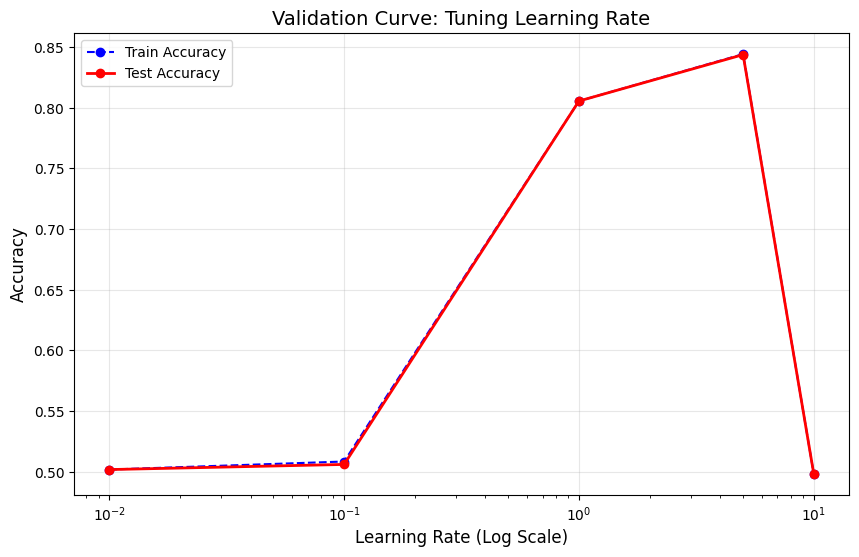

Best Learning Rate: 5.0 with Acc: 0.8438


In [75]:
# --- 1. Setup Tuning ---
learning_rate_values = [0.01, 0.1, 1.0, 5.0, 10.0]

train_accuracies = []
test_accuracies = []

# Pastikan data dalam bentuk Numpy Array biar komputasi cepat
X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train
X_test_np = X_test.values if hasattr(X_test, 'values') else X_test
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test

print("Starting Learning Rate Tuning...")

for lr in learning_rate_values:
    print(f"Testing Learning Rate: {lr}")
    model = LogisticRegressionManual(learning_rate=lr, n_iters=1000)
    model.fit(X_train_np, y_train_np)
    
    # Train Acc
    train_pred = model.predict(X_train_np)
    # PENTING: Pakai .flatten() biar jadi array 1D (N,) sama kayak y_train
    # Ini solusi anti-error akurasi 50%
    train_acc = np.mean(train_pred.flatten() == y_train_np.flatten())
    train_accuracies.append(train_acc)
    
    # Test Acc
    test_pred = model.predict(X_test_np)
    test_acc = np.mean(test_pred.flatten() == y_test_np.flatten())
    test_accuracies.append(test_acc)

# --- 2. Visualization ---
plt.figure(figsize=(10, 6))

# Pakai semilogx karena angka LR loncat-loncat (0.01 -> 10.0)
plt.semilogx(learning_rate_values, train_accuracies, marker='o', linestyle='--', color='blue', label='Train Accuracy')
plt.semilogx(learning_rate_values, test_accuracies, marker='o', linewidth=2, color='red', label='Test Accuracy')

plt.title('Validation Curve: Tuning Learning Rate', fontsize=14)
plt.xlabel('Learning Rate (Log Scale)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find best LR
best_idx = np.argmax(test_accuracies)
print(f"Best Learning Rate: {learning_rate_values[best_idx]} with Acc: {test_accuracies[best_idx]:.4f}")

### E.8 Model Prediction (With Best Learning Rate)

In [83]:
model = LogisticRegressionManual(learning_rate=5, n_iters=1000)
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

Epoch 0: Loss 0.6931 | Accuracy 0.5019
Epoch 50: Loss 0.6910 | Accuracy 0.6161
Epoch 100: Loss 0.6888 | Accuracy 0.7387
Epoch 150: Loss 0.6867 | Accuracy 0.7845
Epoch 200: Loss 0.6846 | Accuracy 0.8056
Epoch 250: Loss 0.6825 | Accuracy 0.8177
Epoch 300: Loss 0.6804 | Accuracy 0.8244
Epoch 350: Loss 0.6783 | Accuracy 0.8285
Epoch 400: Loss 0.6763 | Accuracy 0.8317
Epoch 450: Loss 0.6743 | Accuracy 0.8341
Epoch 500: Loss 0.6723 | Accuracy 0.8357
Epoch 550: Loss 0.6703 | Accuracy 0.8373
Epoch 600: Loss 0.6683 | Accuracy 0.8387
Epoch 650: Loss 0.6664 | Accuracy 0.8396
Epoch 700: Loss 0.6644 | Accuracy 0.8406
Epoch 750: Loss 0.6625 | Accuracy 0.8413
Epoch 800: Loss 0.6606 | Accuracy 0.8420
Epoch 850: Loss 0.6588 | Accuracy 0.8430
Epoch 900: Loss 0.6569 | Accuracy 0.8432
Epoch 950: Loss 0.6551 | Accuracy 0.8439


## F. Evaluation

### F.1 Model Accuracy

#### Test Accuracy

In [88]:
test_accuracy = np.mean(test_predictions.flatten() == y_test.values.flatten())
print(f"Accuracy (Test): {test_accuracy:.3f}") 

Accuracy (Test): 0.844


#### Train Accuracy

In [89]:
train_accuracy = np.mean(train_predictions.flatten() == y_train.values.flatten())
print(f"Accuracy (Train): {train_accuracy:.3f}") 

Accuracy (Train): 0.844


### F.2 Confusion Matrix

In [91]:
TP = np.sum((test_predictions.flatten() == 1) & (y_test == 1))
FP = np.sum((test_predictions.flatten() == 1) & (y_test == 0))
TN = np.sum((test_predictions.flatten() == 0) & (y_test == 0))
FN = np.sum((test_predictions.flatten() == 0) & (y_test == 1))

print(f"True Positive: {TP}")
print(f"False Positive: {FP}")
print(f"True Negative: {TN}")
print(f"False Negative: {FN}")

True Positive: 4493
False Positive: 1065
True Negative: 3875
False Negative: 484


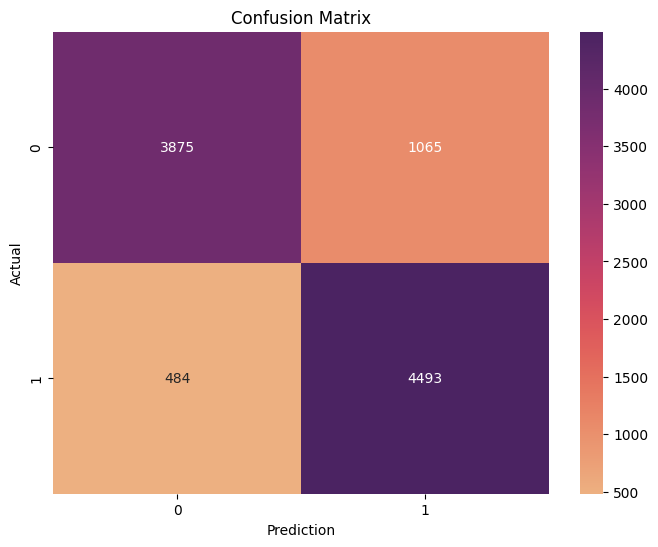

Class: Negative
True Positives: 3875
False Positives: 484
False Negatives: 1065
True Negatives: 4493

Class: Positive
True Positives: 4493
False Positives: 1065
False Negatives: 484
True Negatives: 3875



In [92]:
confusion_matrix = pd.crosstab(y_test, test_predictions.flatten(), rownames=['Actual'], colnames=['Prediction'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, cmap='flare', fmt='d')
plt.title("Confusion Matrix")
plt.show()

cm_array = confusion_matrix.values
TP = np.diag(cm_array)
FP = np.sum(cm_array, axis=0) - TP
FN = np.sum(cm_array, axis=1) - TP
TN = np.sum(cm_array) - (TP + FP + FN)

class_names = confusion_matrix.columns
for i, name in enumerate(class_names):
    if name == 0:
        classes = "Negative"
    else:
        classes = "Positive"
        
    print(f"Class: {classes}")
    print(f"True Positives: {TP[i]}")
    print(f"False Positives: {FP[i]}")
    print(f"False Negatives: {FN[i]}")
    print(f"True Negatives: {TN[i]}\n")

### F.3 Precision

In [93]:
precision = TP / (TP + FP)
precision = np.mean(precision)
print(f"Precision: {precision:.2f}")

Precision: 0.85


### F.4 Recall

In [94]:
recall = TP / (TP + FN)
recall = np.mean(recall)
print(f"Recall: {recall:.2f}")

Recall: 0.84


### F.5 F-1 Score

In [95]:
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F-1 Score: {f1:.2f}")

F-1 Score: 0.85


### F.6 ROC-AUC Visualization

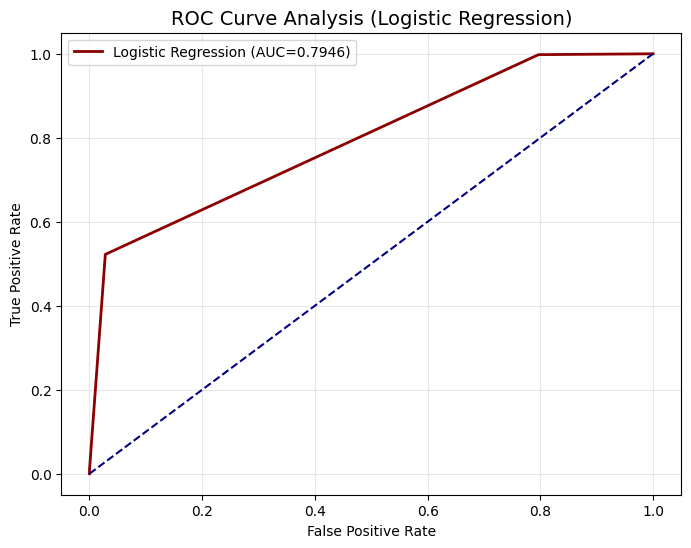

In [96]:
# --- 1. Get Probabilities ---
probs_raw = model.predict_proba(X_test) 
# FLATTEN ITU WAJIB (Biar dimensi jadi (N,), bukan (N, 1))
y_probs = probs_raw.flatten()

# --- 2. Main Logic: Calc ROC Curve ---
# Setup Thresholds
thresholds = np.linspace(0, 1.1, 20) 
tpr_list = []
fpr_list = []

# Prepare Truth Labels (Flatten juga!)
y_true = y_test.values.flatten() if hasattr(y_test, 'values') else y_test.flatten()

# Total Positive (1) & Negative (0)
P = np.sum(y_true == 1)
N = np.sum(y_true == 0)

for t in thresholds:
    # Predict based on threshold t
    # Karena y_probs sudah 1D, hasil ini juga otomatis 1D (Aman!)
    y_pred_temp = (y_probs >= t).astype(int)
    
    # Calculate TP & FP
    TP = np.sum((y_pred_temp == 1) & (y_true == 1))
    FP = np.sum((y_pred_temp == 1) & (y_true == 0))
    
    # Rate Calculation
    # Safety check if P or N is 0 (though unlikely in this dataset)
    tpr = TP / P if P > 0 else 0
    fpr = FP / N if N > 0 else 0
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Calculate AUC
# Use np.trapz (standard numpy)
auc_score = np.trapezoid(tpr_list[::-1], fpr_list[::-1]) 

# --- 3. Visualization ---
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, color='darkred', linewidth=2, label=f'Logistic Regression (AUC={abs(auc_score):.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # Random Guess Line
plt.title('ROC Curve Analysis (Logistic Regression)', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### F.7 Model Evaluation (Visual)

Menghitung kekuatan kata per review...


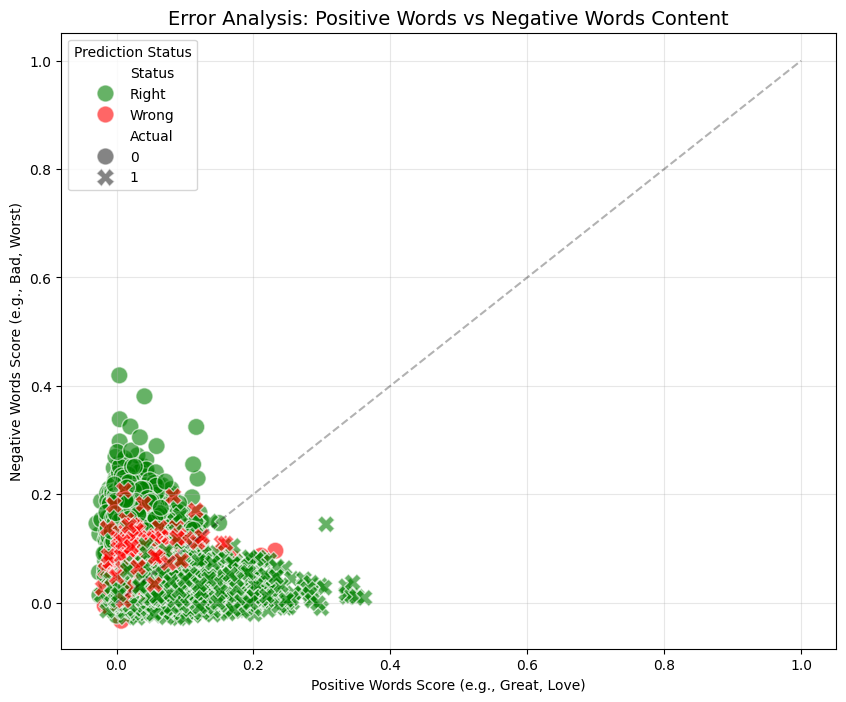

In [105]:
# --- 1. AMBIL BOBOT KATA DARI MODEL ---
# Kita cari tau kata mana yang dianggap Positif & Negatif sama model
weights = model.w.flatten()
# Urutkan index dari yang paling negatif ke paling positif
sorted_indices = np.argsort(weights)

# Ambil 50 kata paling Negatif & 50 kata paling Positif
top_neg_indices = sorted_indices[:50]   # Bobot paling minus
top_pos_indices = sorted_indices[-50:]  # Bobot paling plus

# --- 2. HITUNG SKOR PER REVIEW ---
# Kita hitung total "Energi Positif" dan "Energi Negatif" di setiap review test
# X_test harus berupa Numpy Array
X_test_np = X_test.values if hasattr(X_test, 'values') else X_test

print("Menghitung kekuatan kata per review...")
# Jumlahkan nilai TF-IDF khusus kata-kata positif
pos_score = np.sum(X_test_np[:, top_pos_indices], axis=1)
# Jumlahkan nilai TF-IDF khusus kata-kata negatif
neg_score = np.sum(X_test_np[:, top_neg_indices], axis=1)

# --- 3. BIKIN DATAFRAME PLOTTING ---
# Prediksi
test_predictions = model.predict(X_test_np).flatten()
# Actual (pastikan flatten)
y_actual = y_test.values.flatten() if hasattr(y_test, 'values') else y_test.flatten()

plot_data = pd.DataFrame({
    'Positive Strength': pos_score, # Mirip Satisfaction Level
    'Negative Strength': neg_score, # Mirip Stress Level
    'Actual': y_actual,
    'Prediction': test_predictions
})

# Tentukan Status (Benar/Salah)
plot_data['Status'] = np.where(plot_data['Actual'] == plot_data['Prediction'], 'Right', 'Wrong')

# --- 4. VISUALISASI ---
plt.figure(figsize=(10, 8))

# Kita pakai Jitter dikit biar gak numpuk parah (karena banyak yang 0)
sns.scatterplot(
    data=plot_data, 
    x=plot_data['Positive Strength'] + np.random.normal(0, 0.01, len(plot_data)), 
    y=plot_data['Negative Strength'] + np.random.normal(0, 0.01, len(plot_data)), 
    hue='Status',
    palette={'Right': 'green', 'Wrong': 'red'},
    style='Actual', # Bentuk titik beda buat Pos/Neg asli
    alpha=0.6,
    s=150
)

plt.title('Error Analysis: Positive Words vs Negative Words Content', fontsize=14)
plt.xlabel('Positive Words Score (e.g., Great, Love)')
plt.ylabel('Negative Words Score (e.g., Bad, Worst)')
plt.legend(title='Prediction Status')
plt.grid(True, alpha=0.3)

# Garis Diagonal (Area Galau)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Confusing Area')

plt.show()

### F.8 Model Sigmoid Visualization

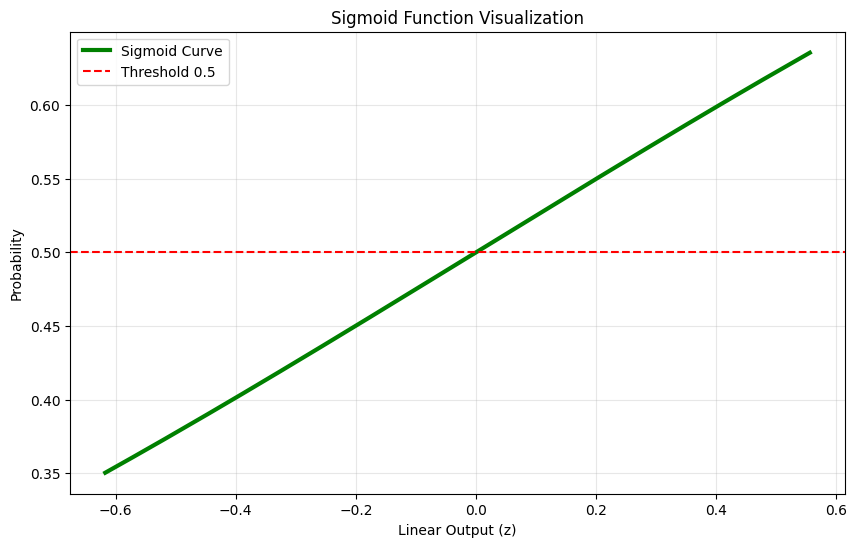

In [106]:
# --- 1. Hitung Z Manual (Simpel) ---
# Ambil X sebagai numpy array
X_matrix = X_test.values if hasattr(X_test, 'values') else X_test

# Rumus: z = w.X + b
z_test = np.dot(X_matrix, model.w) + model.b
z_sort = np.sort(z_test.flatten()) # Flatten biar aman
probs_sort = 1 / (1 + np.exp(-z_sort)) # Rumus Sigmoid

# --- 2. Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(z_sort, probs_sort, color='green', linewidth=3, label='Sigmoid Curve')

# Hiasan dikit biar jelas
plt.axhline(0.5, color='red', linestyle='--', label='Threshold 0.5')
plt.title('Sigmoid Function Visualization')
plt.xlabel('Linear Output (z)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### F.9 Residuals VS Predictions

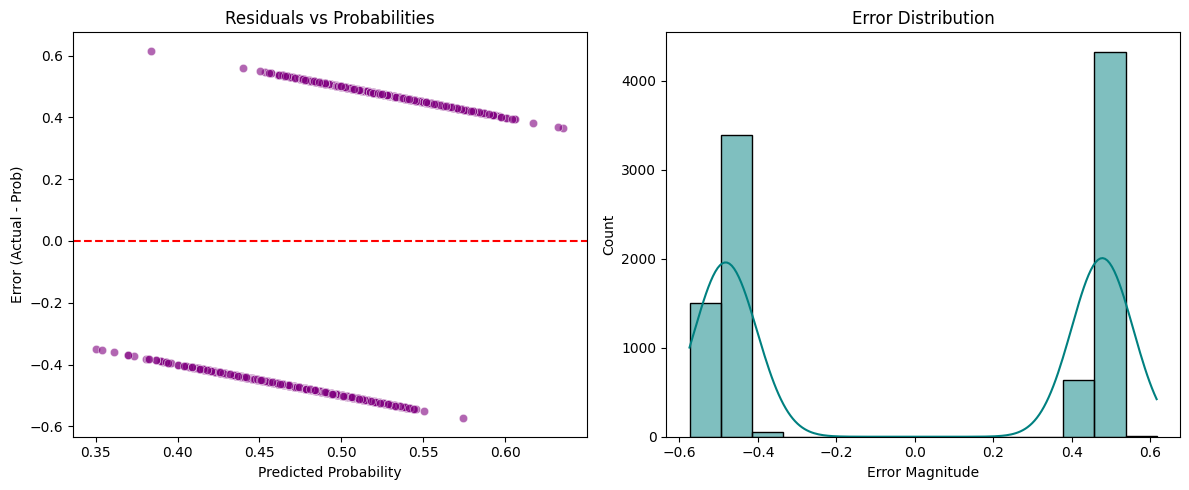

In [107]:
# --- 1. Prepare Data ---
y_probs_raw = model.predict_proba(X_test)

# FLATTEN (Wajib! Biar dimensinya cocok sama y_test)
y_probs = y_probs_raw.flatten()
y_true = y_test.values.flatten() if hasattr(y_test, 'values') else y_test.flatten()

# Calculate Residual (Actual - Probability)
residuals = y_true - y_probs

# --- 2. Visualization (Copy-Paste kodemu) ---
plt.figure(figsize=(12, 5))

# Plot 1: Residual Scatter
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_probs, y=residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Error (Actual - Prob)")

# Plot 2: Residual Histogram
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='teal')
plt.title("Error Distribution")
plt.xlabel("Error Magnitude")

plt.tight_layout()
plt.show()